In [18]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [9]:
bb = pd.read_csv("day (1).csv")
bb.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [10]:
bb.tail()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
725      726  27-12-2019       1   1    12        0        5           1   
726      727  28-12-2019       1   1    12        0        6           0   
727      728  29-12-2019       1   1    12        0        0           0   
728      729  30-12-2019       1   1    12        0        1           1   
729      730  31-12-2019       1   1    12        0        2           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
725           2  10.420847  11.33210  65.2917  23.458911     247        1867   
726           2  10.386653  12.75230  59.0000  10.416557     644        2451   
727           2  10.386653  12.12000  75.2917   8.333661     159        1182   
728           1  10.489153  11.58500  48.3333  23.500518     364        1432   
729           2   8.849153  11.17435  57.7500  10.374682     439        2290   

      cnt  
725  2114  
726  3095  
727  1341  
728  1796  
729  2729

In [11]:
bb.shape

(730, 16)

In [12]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [13]:
bb.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [28]:
bb.head(1)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   

   cnt  
0  985

In [31]:
## checking null
bb.isnull().sum ()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

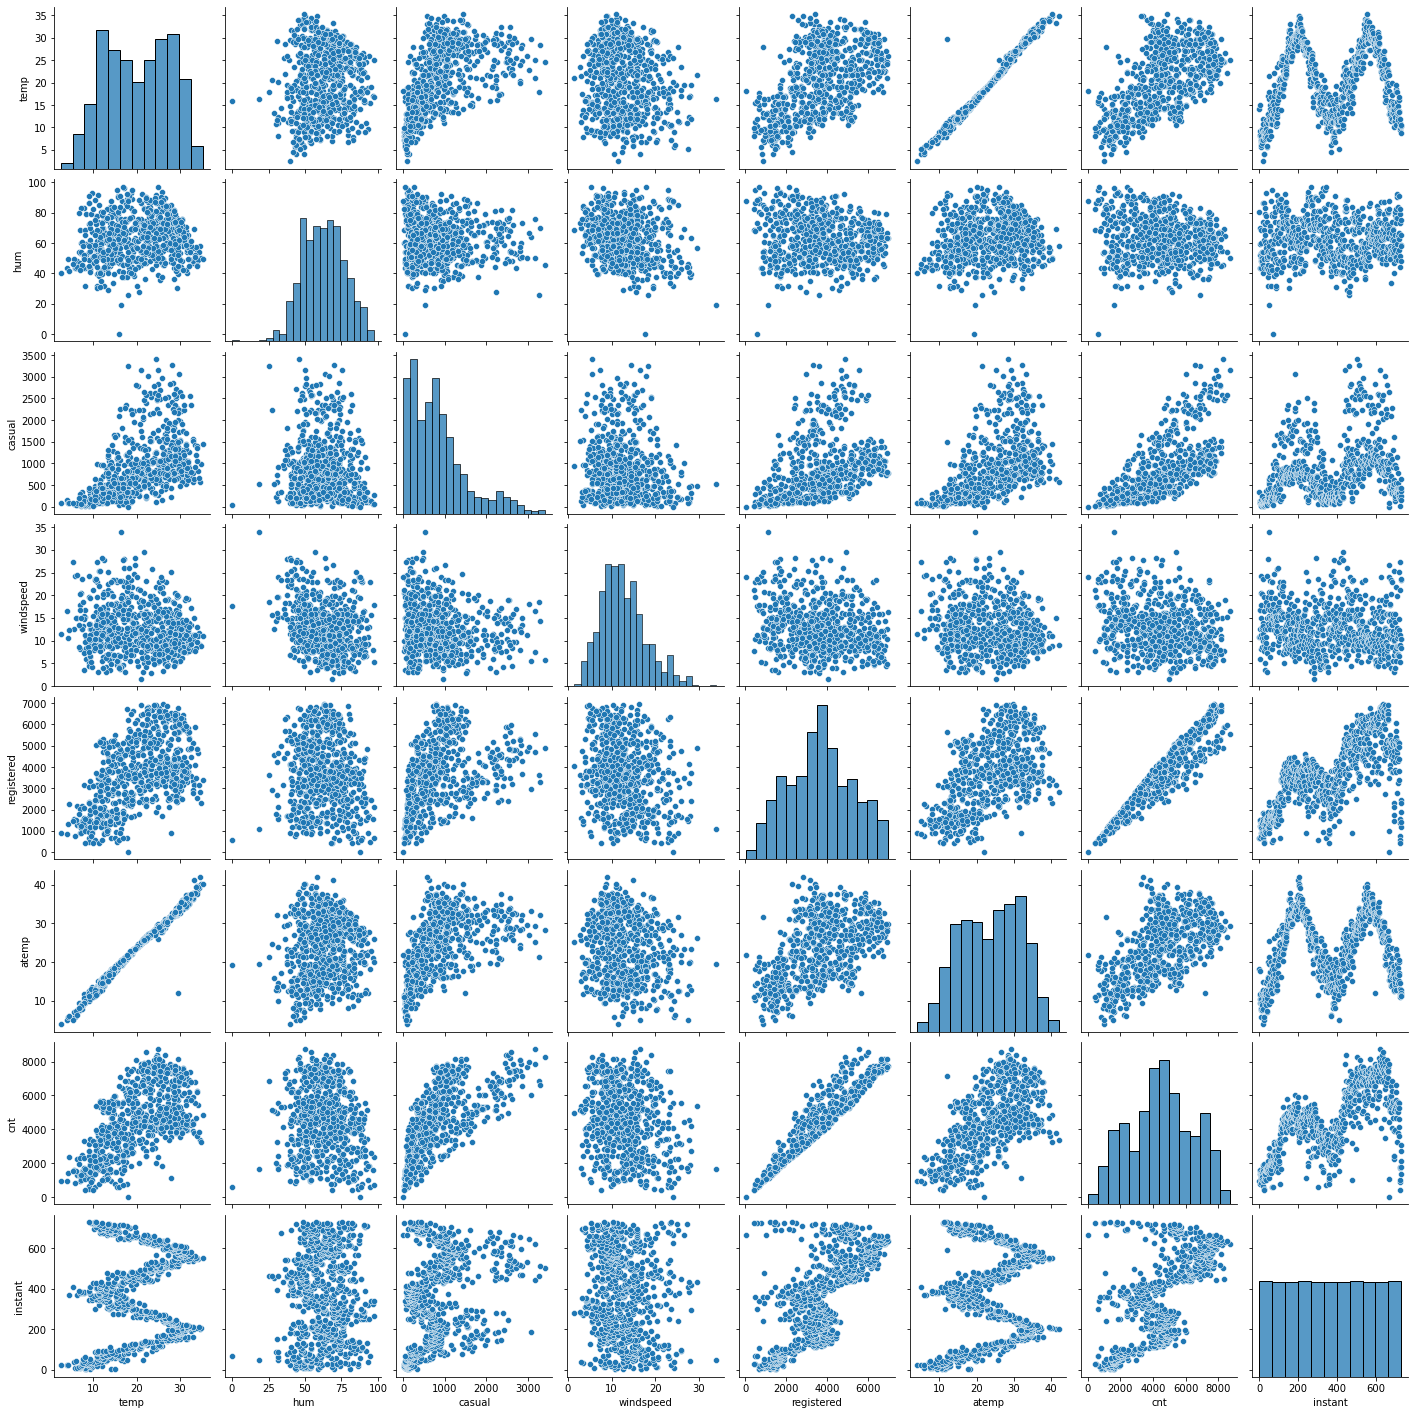

In [32]:
#visualizing the numeric variables of the dataset using pairplot 
sns.pairplot(bb, vars=["temp", "hum",'casual','windspeed','registered','atemp','cnt','instant'])
plt.show()

In [33]:
#mapping categorical variables with their subcategories to help with visualization analysis 
bb['season']=bb.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bb['mnth']=bb.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bb['weathersit']=bb.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bb['weekday']=bb.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bb.head()

instant      dteday  season  yr mnth  holiday weekday  workingday  \
0        1  01-01-2018  spring   0  Jan        0     Mon           1   
1        2  02-01-2018  spring   0  Jan        0     Tue           1   
2        3  03-01-2018  spring   0  Jan        0     Wed           1   
3        4  04-01-2018  spring   0  Jan        0     Thu           1   
4        5  05-01-2018  spring   0  Jan        0     Fri           1   

      weathersit       temp     atemp      hum  windspeed  casual  registered  \
0  Mist + Cloudy  14.110847  18.18125  80.5833  10.749882     331         654   
1  Mist + Cloudy  14.902598  17.68695  69.6087  16.652113     131         670   
2          Clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3          Clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4          Clear   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

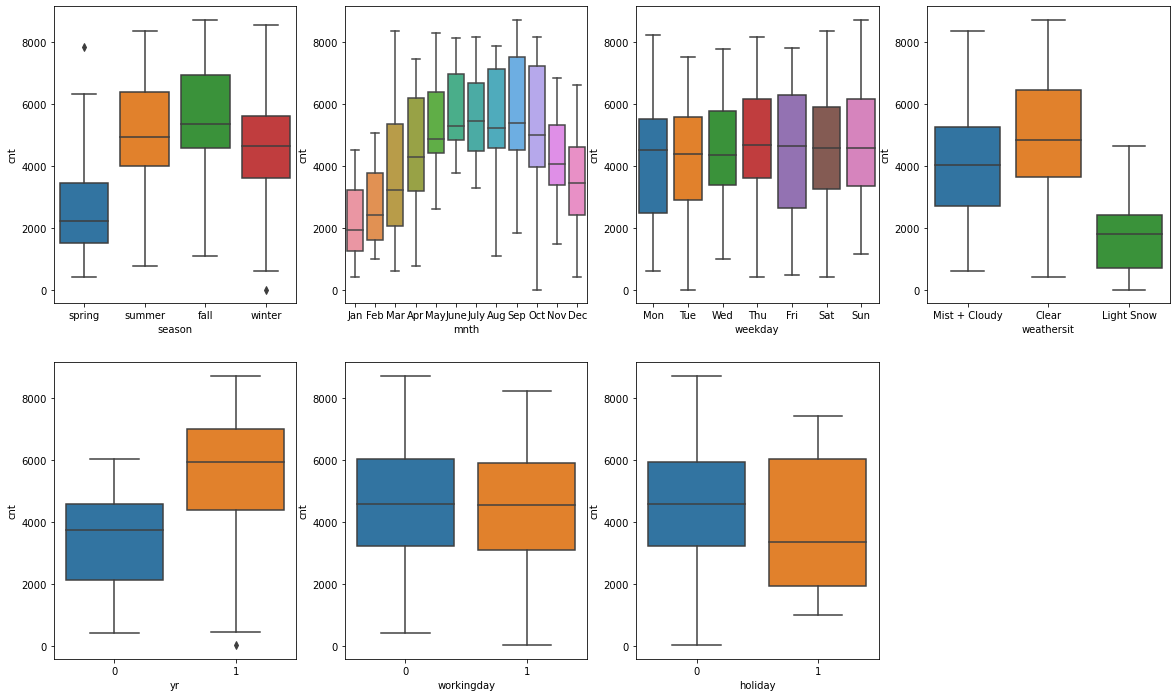

In [34]:
#visualizing the categorical variables of the dataset using boxplot 
plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=bb)
plt.subplot(2, 4, 2)
sns.boxplot(x='mnth', y='cnt', data=bb)
plt.subplot(2, 4, 3)
sns.boxplot(x='weekday', y='cnt', data=bb)
plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=bb)
plt.subplot(2, 4, 5)
sns.boxplot(x='yr', y='cnt', data=bb)
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=bb)
plt.subplot(2, 4, 7)
sns.boxplot(x='holiday', y='cnt', data=bb)
plt.show()

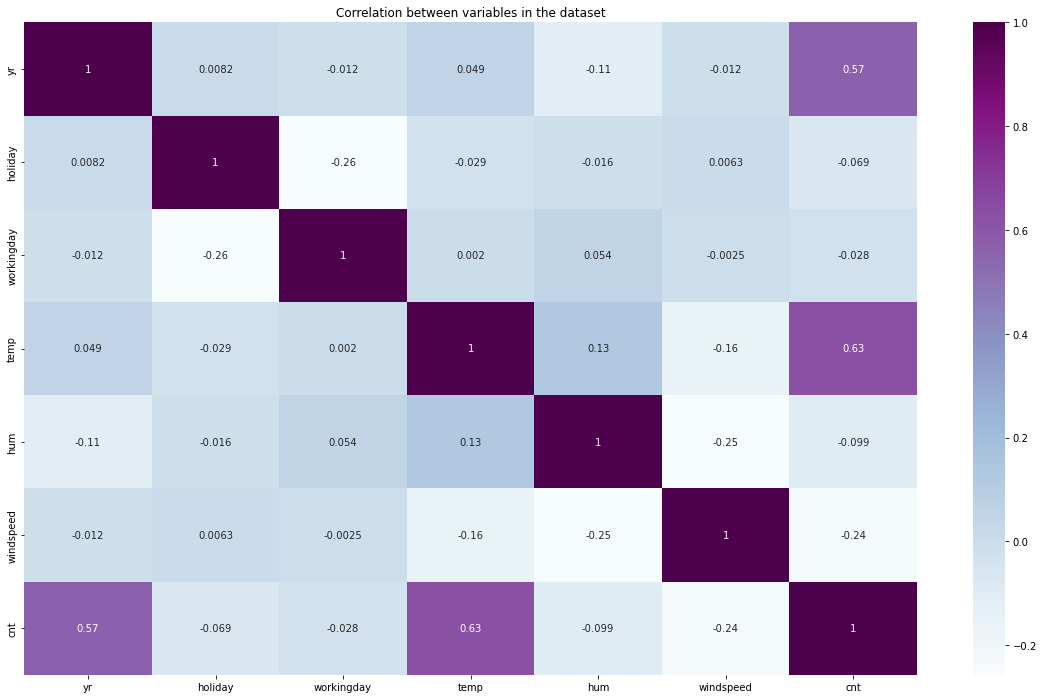

In [52]:
#making a heatmap to showcase correlation between the variables and decide whether we can perform linear regression on the dataset
plt.figure(figsize=(20, 12))
sns.heatmap(bb.corr(), cmap='BuPu', annot=True)
plt.title('Correlation between variables in the dataset')
plt.show()

In [78]:
#dropping the un-required variables from the dataset 
#dropping the variables atemp, instant, dteday, casual, registered as they are not needed for the analysis 
#atemp is not needed as temp is already being used, dteday and casual are also not required for regression analysis 

bb = bb.drop(['atemp', 'instant', 'dteday', 'casual', 'registered'], axis=1)
bb.head(5)

KeyError: "['atemp' 'instant' 'dteday' 'casual' 'registered'] not found in axis"

In [56]:
bb.head()

season  yr mnth  holiday weekday  workingday     weathersit       temp  \
0  spring   0  Jan        0     Mon           1  Mist + Cloudy  14.110847   
1  spring   0  Jan        0     Tue           1  Mist + Cloudy  14.902598   
2  spring   0  Jan        0     Wed           1          Clear   8.050924   
3  spring   0  Jan        0     Thu           1          Clear   8.200000   
4  spring   0  Jan        0     Fri           1          Clear   9.305237   

       hum  windspeed   cnt  
0  80.5833  10.749882   985  
1  69.6087  16.652113   801  
2  43.7273  16.636703  1349  
3  59.0435  10.739832  1562  
4  43.6957  12.522300  1600

In [57]:
print(bb.shape)
print(bb.info())
print(bb.describe())

(730, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB
None
               yr     holiday  workingday        temp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    0.028767    0.690411   20.319259   62.765175   12.763620   
std      0.500343    0.167266    0.462641

In [65]:
#creating dummy variables 
#creating dummy variables for the variables of month, weekday, weathersit, seasons
month = pd.get_dummies(bb.mnth, drop_first=True)
weekday = pd.get_dummies(bb.weekday, drop_first=True)
weathersit = pd.get_dummies(bb.weathersit, drop_first=True)
season = pd.get_dummies(bb.season, drop_first=True)

In [68]:
season.head(1) #2

spring  summer  winter
0       1       0       0

In [70]:
month.head(1)#12

Aug  Dec  Feb  Jan  July  June  Mar  May  Nov  Oct  Sep
0    0    0    0    1     0     0    0    0    0    0    0

In [72]:
weathersit.head(1)#2

Light Snow  Mist + Cloudy
0           0              1

In [73]:
weekday.head(1) #5

Mon  Sat  Sun  Thu  Tue  Wed
0    1    0    0    0    0    0

In [75]:
#adding the dummy variables to the original dataframe
bb = pd.concat([bb,month, weekday, weathersit, season], axis=1)
bb.head(5)

season  yr mnth  holiday weekday  workingday     weathersit       temp  \
0  spring   0  Jan        0     Mon           1  Mist + Cloudy  14.110847   
1  spring   0  Jan        0     Tue           1  Mist + Cloudy  14.902598   
2  spring   0  Jan        0     Wed           1          Clear   8.050924   
3  spring   0  Jan        0     Thu           1          Clear   8.200000   
4  spring   0  Jan        0     Fri           1          Clear   9.305237   

       hum  windspeed  ...  Sat  Sun  Thu  Tue  Wed  Light Snow  \
0  80.5833  10.749882  ...    0    0    0    0    0           0   
1  69.6087  16.652113  ...    0    0    0    1    0           0   
2  43.7273  16.636703  ...    0    0    0    0    1           0   
3  59.0435  10.739832  ...    0    0    1    0    0           0   
4  43.6957  12.522300  ...    0    0    0    0    0           0   

   Mist + Cloudy  spring  summer  winter  
0              1       1       0       0  
1              1       1       0       0  
2              0       1       0       0  
3              0       1       0       0  
4              0       1       0       0  

[5 rows x 33 columns]

In [76]:
bb.shape

(730, 33)

In [77]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         730 non-null    object 
 1   yr             730 non-null    int64  
 2   mnth           730 non-null    object 
 3   holiday        730 non-null    int64  
 4   weekday        730 non-null    object 
 5   workingday     730 non-null    int64  
 6   weathersit     730 non-null    object 
 7   temp           730 non-null    float64
 8   hum            730 non-null    float64
 9   windspeed      730 non-null    float64
 10  cnt            730 non-null    int64  
 11  Aug            730 non-null    uint8  
 12  Dec            730 non-null    uint8  
 13  Feb            730 non-null    uint8  
 14  Jan            730 non-null    uint8  
 15  July           730 non-null    uint8  
 16  June           730 non-null    uint8  
 17  Mar            730 non-null    uint8  
 18  May       

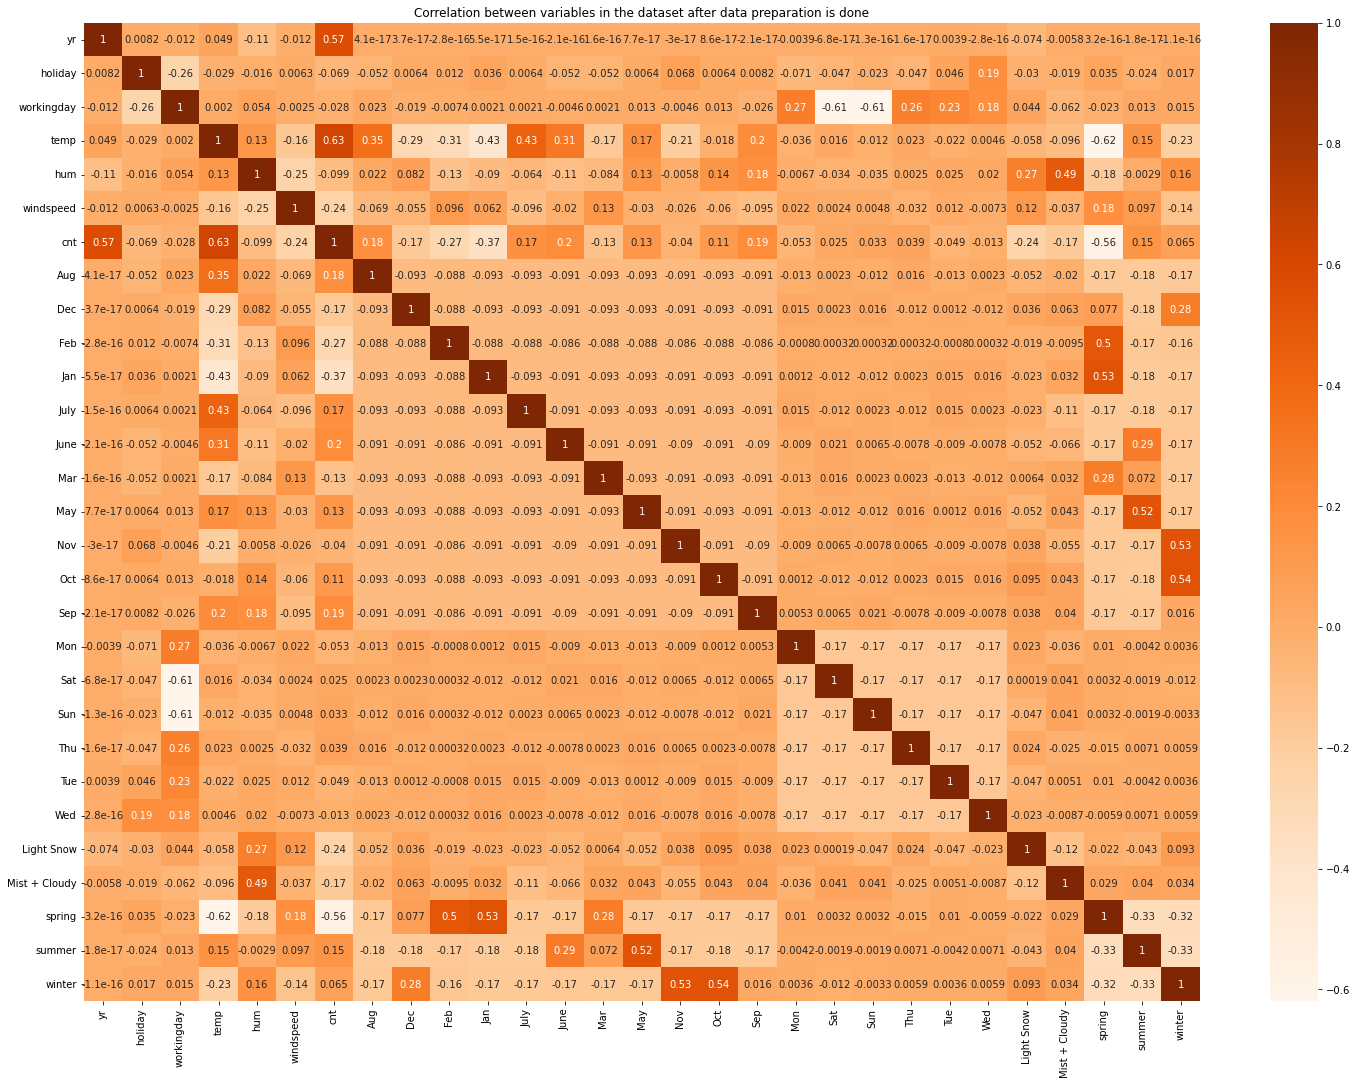

In [82]:
plt.figure(figsize=(25, 18))
sns.heatmap(bb.corr(), cmap='Oranges', annot=True)
plt.title('Correlation between variables in the dataset after data preparation is done')
plt.show()

In [84]:
#we have to rescale the variables like hum, temp, windspeed, cnt as they have large values as compared to the other variables of the dataset
#we have to normalize these values using the scaler.fit_transform() 
scaler = MinMaxScaler()
scaler_var = ['hum', 'windspeed', 'temp', 'cnt']
bb_train[scaler_var] = scaler.fit_transform(df_train[scaler_var])

NameError: name 'MinMaxScaler' is not defined

# preparing for model training

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [94]:
#splitting the dataset into train and test sets
bb_train, bb_test = train_test_split(bb, train_size=0.7, random_state=100)

In [95]:
bb_test.shape

(220, 33)

In [96]:
bb_train.shape


(510, 33)

In [97]:
#we have to rescale the variables like hum, temp, windspeed, cnt as they have large values as compared to the other variables of the dataset
#we have to normalize these values using the scaler.fit_transform() 
scaler = MinMaxScaler()
scaler_var = ['hum', 'windspeed', 'temp', 'cnt']
bb_train[scaler_var] = scaler.fit_transform(df_train[scaler_var])

In [98]:
bb_train.head()

season  yr  mnth  holiday weekday  workingday     weathersit      temp  \
576    fall   1  July        0     Wed           1          Clear  0.815169   
426  spring   1   Mar        0     Sun           0  Mist + Cloudy  0.442393   
728  spring   1   Dec        0     Mon           1          Clear  0.245101   
482  summer   1   Apr        0     Sun           0  Mist + Cloudy  0.395666   
111  summer   0   Apr        0     Sun           0  Mist + Cloudy  0.345824   

          hum  windspeed  ...  Sat  Sun  Thu  Tue  Wed  Light Snow  \
576  0.725633   0.264686  ...    0    0    0    0    1           0   
426  0.640189   0.255342  ...    0    1    0    0    0           0   
728  0.498067   0.663106  ...    0    0    0    0    0           0   
482  0.504508   0.188475  ...    0    1    0    0    0           0   
111  0.751824   0.380981  ...    0    1    0    0    0           0   

     Mist + Cloudy  spring  summer  winter  
576              0       0       0       0  
426              1       1       0       0  
728              0       1       0       0  
482              1       0       1       0  
111              1       0       1       0  

[5 rows x 33 columns]

In [99]:
bb_test.head()

season  yr  mnth  holiday weekday  workingday     weathersit       temp  \
184    fall   0  July        1     Wed           0  Mist + Cloudy  29.793347   
535  summer   1  June        0     Thu           1          Clear  32.082500   
299  winter   0   Oct        0     Sat           0  Mist + Cloudy  19.270000   
221    fall   0   Aug        0     Fri           1          Clear  31.433347   
152  summer   0  June        0     Sat           0          Clear  29.315000   

         hum  windspeed  ...  Sat  Sun  Thu  Tue  Wed  Light Snow  \
184  63.7917   5.459106  ...    0    0    0    0    1           0   
535  59.2083   7.625404  ...    0    0    1    0    0           0   
299  81.2917  13.250121  ...    1    0    0    0    0           0   
221  42.4167  13.417286  ...    0    0    0    0    0           0   
152  30.5000  19.583229  ...    1    0    0    0    0           0   

     Mist + Cloudy  spring  summer  winter  
184              1       0       0       0  
535              0       0       1       0  
299              1       0       0       1  
221              0       0       0       0  
152              0       0       1       0  

[5 rows x 33 columns]

In [101]:
#checking the normalized values of the train set after performing scaling 
bb_train.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.711765    0.537440    0.650480    0.320883   
std      0.500429    0.157763    0.453386    0.225858    0.145846    0.169803   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.538643    0.199179   
50%      1.000000    0.000000    1.000000    0.542596    0.653714    0.296763   
75%      1.000000    0.000000    1.000000    0.735215    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt         Aug         Dec         Feb  ...         Sat  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.513499    0.096078    0.084314    0.066667  ...    0.129412   
std      0.224421    0.294988    0.278131    0.249689  ...    0.335985   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.356420    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.518638    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.684710    0.000000    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              Sun         Thu         Tue         Wed  Light Snow  \
count  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.137255    0.143137    0.152941    0.135294    0.029412   
std      0.344454    0.350557    0.360284    0.342373    0.169124   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       Mist + Cloudy      spring      summer      winter  
count     510.000000  510.000000  510.000000  510.000000  
mean        0.345098    0.243137    0.247059    0.247059  
std         0.475867    0.429398    0.431725    0.431725  
min         0.000000    0.000000    0.000000    0.000000  
25%         0.000000    0.000000    0.000000    0.000000  
50%         0.000000    0.000000    0.000000    0.000000  
75%         1.000000    0.000000    0.000000    0.000000  
max         1.000000    1.000000    1.000000    1.000000  

[8 rows x 29 columns]

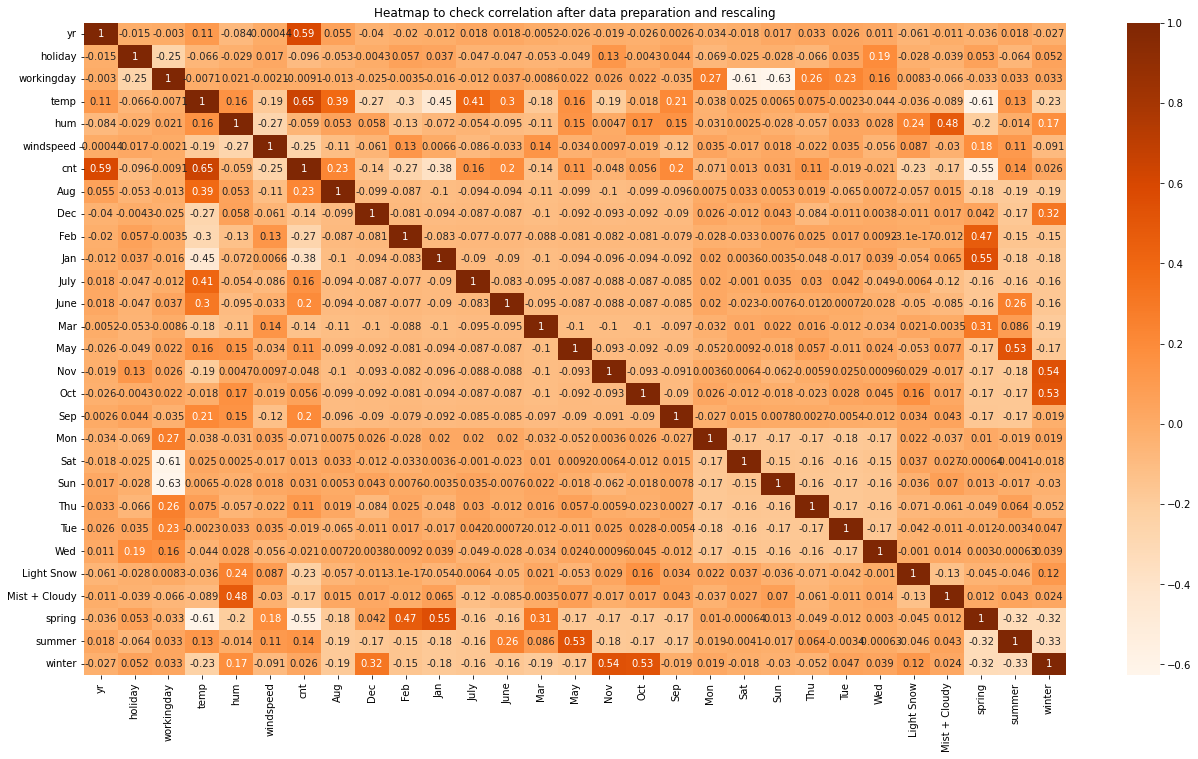

In [103]:
# checking the correlation coefficients to see which variables are highly correlated post data preparation and rescaling

plt.figure(figsize = (22, 12))
sns.heatmap(bb_train.corr(), cmap="Oranges", annot=True)
plt.title('Heatmap to check correlation after data preparation and rescaling')
plt.show()

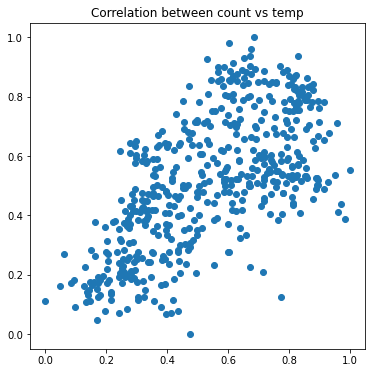

In [104]:
#checking for correlation between count and temp using a pairplot
plt.figure(figsize=[6,6])
plt.scatter(bb_train.temp, bb_train.cnt)
plt.title('Correlation between count vs temp')
plt.show()

In [112]:
#building our first model using the variable temp
#preparing the variables for model building 

y_train = bb_train.pop('cnt')
X_train = bb_train

KeyError: 'cnt'

In [113]:
#checking the variables
print(y_train.head(5))
print(y_train.shape)

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64
(510,)


In [114]:
#add a constant (intercept)
X_train_sm = sm.add_constant(X_train['temp'])

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [115]:
#checking model summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           2.46e-61
Time:                        20:29:55   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

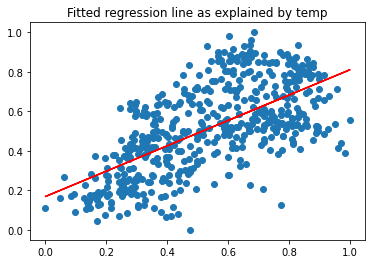

In [116]:
#visualising our data with a scatter plot and the fitted regression line to see the best fit line
plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], 0.1690 + 0.6409*X_train_sm.iloc[:, 1], 'r')
plt.title('Fitted regression line as explained by temp')
plt.show()

In [117]:
#adding another variable thus performing multiple regression 
#adding variable yr and checking to see if it improves the R-squared

X_train_sm = X_train[['temp', 'yr']]
X_train_sm = sm.add_constant(X_train_sm)

#create second model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const    0.079266
temp     0.584266
yr       0.236739
dtype: float64

In [118]:
#checking summary with temp and yr as selected variables
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          3.34e-130
Time:                        20:31:59   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.000       0.050       0.109
temp           0.5843      0.025     23.698      0.000       0.536       0.633
yr             0.2367      0.011     21.276      0.000       0.215       0.259
==============================================================================
Omnibus:                       32.310   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                          -0.513   Prob(JB):                     2.71e-10
Kurtosis:                       4.010   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""